In [7]:

import pandas as pd
import numpy as np
import datetime
import locale


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#####
data processing


load sales data of Biermischungen:

In [9]:
df_Biermischung = pd.read_csv('Absatz von Biermischungen.csv')
df_Biermischung 

FileNotFoundError: ignored

In [ ]:
#Delete useless columns and select only data for the state of hessen.
df_Biermischung = df_Biermischung.drop(columns = ['Unnamed: 0'])
df_Biermischung['region'] = df_Biermischung['region'].str.strip()
df_Biermischung['time'] = df_Biermischung['time'].str.strip()
df_Biermischung = df_Biermischung.loc[df_Biermischung['region'] == 'Hessen']
df_Biermischung.reset_index(drop=True, inplace=True)
df_Biermischung

,region,absatz(hl),time
0,Hessen,3863.85,2020-Februar
1,Hessen,.,2020-Januar
2,Hessen,.,2019-Dezember
3,Hessen,.,2019-November
4,Hessen,.,2019-Oktober
5,Hessen,6479.98,2019-September
6,Hessen,18210.55,2019-August
7,Hessen,25959.01,2019-Juli
8,Hessen,24032.65,2019-Juni
9,Hessen,17066.44,2019-Mai


In [ ]:
#split time column into two columns
df_Biermischung[['year', 'month']] = df_Biermischung['time'].str.split('-', expand=True)
df_Biermischung = df_Biermischung.drop(columns = ['time'])
df_Biermischung

,region,absatz(hl),year,month
0,Hessen,3863.85,2020,Februar
1,Hessen,.,2020,Januar
2,Hessen,.,2019,Dezember
3,Hessen,.,2019,November
4,Hessen,.,2019,Oktober
5,Hessen,6479.98,2019,September
6,Hessen,18210.55,2019,August
7,Hessen,25959.01,2019,Juli
8,Hessen,24032.65,2019,Juni
9,Hessen,17066.44,2019,Mai


In [ ]:
#Using number to represent month
def month_to_number(month):
    time_format = datetime.datetime.strptime(month,'%B')
    return int(time_format.strftime('%m'))

df_Biermischung['month'] = df_Biermischung['month'].apply(lambda x:month_to_number(x))
df_Biermischung

,region,absatz(hl),year,month
0,Hessen,3863.85,2020,2
1,Hessen,.,2020,1
2,Hessen,.,2019,12
3,Hessen,.,2019,11
4,Hessen,.,2019,10
5,Hessen,6479.98,2019,9
6,Hessen,18210.55,2019,8
7,Hessen,25959.01,2019,7
8,Hessen,24032.65,2019,6
9,Hessen,17066.44,2019,5


In [ ]:
#Using 'nan' to represent missing value
df_Biermischung.loc[df_Biermischung['absatz(hl)'].str.strip() == '.','absatz(hl)'] = np.nan
df_Biermischung

,region,absatz(hl),year,month
0,Hessen,3863.85,2020,2
1,Hessen,NaN,2020,1
2,Hessen,NaN,2019,12
3,Hessen,NaN,2019,11
4,Hessen,NaN,2019,10
5,Hessen,6479.98,2019,9
6,Hessen,18210.55,2019,8
7,Hessen,25959.01,2019,7
8,Hessen,24032.65,2019,6
9,Hessen,17066.44,2019,5


In [ ]:
df_Biermischung = df_Biermischung.drop(columns = ['region'])
df_Biermischung = df_Biermischung.rename(columns={'absatz(hl)': 'sales of biermischung'})
df_Biermischung

,sales of biermischung,year,month
0,3863.85,2020,2
1,NaN,2020,1
2,NaN,2019,12
3,NaN,2019,11
4,NaN,2019,10
5,6479.98,2019,9
6,18210.55,2019,8
7,25959.01,2019,7
8,24032.65,2019,6
9,17066.44,2019,5


load sales data of Bier:

In [ ]:
#the data structure of Bier is the same as Biermischung
df_Bier = pd.read_csv('Bierabsatz.csv')
df_Bier = df_Bier.drop(columns = ['Unnamed: 0'])
df_Bier['region'] = df_Bier['region'].str.strip()
df_Bier['time'] = df_Bier['time'].str.strip()
df_Bier = df_Bier.loc[df_Bier['region'] == 'Hessen']
df_Bier.reset_index(drop=True, inplace=True)
df_Bier[['year', 'month']] = df_Bier['time'].str.split('-', expand=True)
df_Bier = df_Bier.drop(columns = ['time'])
df_Bier['month'] = df_Bier['month'].apply(lambda x:month_to_number(x))
df_Bier = df_Bier.drop(columns = ['region'])
df_Bier = df_Bier.rename(columns={'absatz(hl)': 'sales of bier'})
df_Bier

,sales of bier,year,month
0,134028.67,2020,2
1,137445.95,2020,1
2,146870.67,2019,12
3,150859.03,2019,11
4,159777.40,2019,10
5,165413.74,2019,9
6,209412.67,2019,8
7,258228.73,2019,7
8,225702.97,2019,6
9,219944.99,2019,5


load holiday data:

In [ ]:
df_holiday = pd.read_csv('date_holiday_monthly.csv')
df_holiday

,Unnamed: 0,num of Non-working day
0,2015-01,10
1,2015-02,8
2,2015-03,9
3,2015-04,10
4,2015-05,13
5,2015-06,8
6,2015-07,8
7,2015-08,10
8,2015-09,8
9,2015-10,10


In [ ]:
#split date into year and month
df_holiday = df_holiday.rename(columns={'Unnamed: 0': 'date'})
df_holiday[['year', 'month']] = df_holiday['date'].str.split('-', expand=True)
df_holiday['month'] = df_holiday['month'].astype(int)
df_holiday = df_holiday.drop(columns = ['date'])
df_holiday

,num of Non-working day,year,month
0,10,2015,1
1,8,2015,2
2,9,2015,3
3,10,2015,4
4,13,2015,5
5,8,2015,6
6,8,2015,7
7,10,2015,8
8,8,2015,9
9,10,2015,10


load weather date:

In [ ]:
df_weather = pd.read_csv('weather.csv')
df_weather

,Unnamed: 0,Temperature-High,Temperature-Low,Temperature-Average,Humidity-High,Humidity-Low,Humidity-Average,Pressure-High,Pressure-Low,Pressure-Average,location
0,1-2015,"14 °C (10. Jan, 03:20)","-5 °C (19. Jan, 05:20)",2 °C,"100% (1. Jan, 00:20)","57% (10. Jan, 23:20)",85%,"1036 mbar (1. Jan, 00:20)","971 mbar (30. Jan, 02:20)",1014 mbar,Korbach
1,2-2015,"9 °C (21. Feb, 00:20)","-7 °C (7. Feb, 03:20)",1 °C,"100% (1. Feb, 07:20)","41% (8. Feb, 15:20)",82%,"1041 mbar (1. Feb, 07:20)","986 mbar (1. Feb, 00:20)",1017 mbar,Korbach
2,3-2015,"18 °C (25. Mär, 15:20)","-4 °C (23. Mär, 05:20)",5 °C,"100% (4. Mär, 03:20)","40% (25. Mär, 16:20)",78%,"1036 mbar (4. Mär, 03:20)","990 mbar (31. Mär, 06:20)",1019 mbar,Korbach
3,4-2015,"24 °C (15. Apr, 15:20)","-3 °C (7. Apr, 06:20)",8 °C,"100% (9. Apr, 06:50)","21% (21. Apr, 18:20)",68%,"1037 mbar (9. Apr, 06:50)","1001 mbar (27. Apr, 04:20)",1020 mbar,Korbach
4,5-2015,"26 °C (12. Mai, 14:20)","2 °C (1. Mai, 05:20)",12 °C,"100% (1. Mai, 03:20)","34% (10. Mai, 16:20)",70%,"1027 mbar (1. Mai, 03:20)","1001 mbar (5. Mai, 04:20)",1016 mbar,Korbach
5,6-2015,"31 °C (5. Jun, 16:20)","5 °C (17. Jun, 05:20)",16 °C,"100% (18. Jun, 09:00)","29% (7. Jun, 16:20)",67%,"1029 mbar (18. Jun, 09:00)","1004 mbar (22. Jun, 23:20)",1019 mbar,Korbach
6,7-2015,"36 °C (4. Jul, 14:20)","6 °C (10. Jul, 04:20)",19 °C,"100% (10. Jul, 04:20)","24% (17. Jul, 17:20)",69%,"1025 mbar (10. Jul, 04:20)","1001 mbar (25. Jul, 10:20)",1015 mbar,Korbach
7,8-2015,"34 °C (6. Aug, 17:00)","9 °C (1. Aug, 04:20)",20 °C,"100% (5. Aug, 05:46)","24% (6. Aug, 17:20)",70%,"1026 mbar (5. Aug, 05:46)","1004 mbar (24. Aug, 14:20)",1016 mbar,Korbach
8,9-2015,"23 °C (12. Sep, 15:20)","2 °C (28. Sep, 07:02)",13 °C,"100% (1. Sep, 13:46)","42% (30. Sep, 16:00)",81%,"1037 mbar (1. Sep, 13:46)","996 mbar (16. Sep, 19:20)",1018 mbar,Korbach
9,10-2015,"19 °C (6. Okt, 14:20)","-1 °C (12. Okt, 06:20)",9 °C,"100% (1. Okt, 07:20)","40% (2. Okt, 15:20)",85%,"1033 mbar (1. Okt, 07:20)","1004 mbar (6. Okt, 17:20)",1019 mbar,Korbach


In [ ]:
#clean the data, remove useless information
#transfer string data to float data
df_weather.columns = ['date', 'max. temperature', 'min. temperature', 'avg temperature', 
                     'max. Humidit', 'min. Humidit', 'avg Humidit',
                     'max. Pressure', 'min. Pressure', 'avg Pressure', 'location']
for index in df_weather.drop(columns=['date', 'location', 'max. Humidit', 'min. Humidit', 'avg Humidit']):
    df_weather[index] = df_weather[index].apply(lambda x: x.split()[0])
    df_weather[index]= df_weather[index].astype(float)
    
for index in df_weather[['max. Humidit', 'min. Humidit', 'avg Humidit']]:
    df_weather[index] = df_weather[index].apply(lambda x: float(x.split()[0].strip("%"))/100)

df_weather


,date,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,location
0,1-2015,14.0,-5.0,2.0,1.00,0.57,0.85,1036.0,971.0,1014.0,Korbach
1,2-2015,9.0,-7.0,1.0,1.00,0.41,0.82,1041.0,986.0,1017.0,Korbach
2,3-2015,18.0,-4.0,5.0,1.00,0.40,0.78,1036.0,990.0,1019.0,Korbach
3,4-2015,24.0,-3.0,8.0,1.00,0.21,0.68,1037.0,1001.0,1020.0,Korbach
4,5-2015,26.0,2.0,12.0,1.00,0.34,0.70,1027.0,1001.0,1016.0,Korbach
5,6-2015,31.0,5.0,16.0,1.00,0.29,0.67,1029.0,1004.0,1019.0,Korbach
6,7-2015,36.0,6.0,19.0,1.00,0.24,0.69,1025.0,1001.0,1015.0,Korbach
7,8-2015,34.0,9.0,20.0,1.00,0.24,0.70,1026.0,1004.0,1016.0,Korbach
8,9-2015,23.0,2.0,13.0,1.00,0.42,0.81,1037.0,996.0,1018.0,Korbach
9,10-2015,19.0,-1.0,9.0,1.00,0.40,0.85,1033.0,1004.0,1019.0,Korbach


In [ ]:
#We have weather conditions for 9 cities in the state of hessen,
#using averages to represent the entire state
for date in df_weather.loc[df_weather['location']=='Korbach']['date']:
    col = df_weather.loc[df_weather['date']== date].drop(columns=['date', 'location']).mean(axis=0)
    col['location'] = 'Hessen'
    col['date'] = date
    df_weather = df_weather.append(col,ignore_index=True)

df_weather = df_weather.loc[df_weather['location']== 'Hessen'].round(decimals=2)
df_weather.reset_index(drop=True, inplace=True)
df_weather

,date,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,location
0,1-2015,14.67,-4.78,2.44,1.00,0.50,0.86,1037.11,971.89,1015.78,Hessen
1,2-2015,9.78,-6.67,1.44,1.00,0.39,0.81,1041.22,987.44,1017.22,Hessen
2,3-2015,18.00,-3.22,6.00,1.00,0.36,0.75,1037.22,991.89,1019.56,Hessen
3,4-2015,24.22,-2.33,9.44,1.00,0.22,0.65,1037.78,1001.11,1020.22,Hessen
4,5-2015,27.22,2.11,13.33,1.00,0.30,0.66,1027.22,1000.89,1015.89,Hessen
5,6-2015,31.89,6.33,17.00,1.00,0.26,0.65,1028.22,1004.67,1019.00,Hessen
6,7-2015,36.89,6.56,20.44,0.98,0.22,0.63,1025.00,1002.00,1015.00,Hessen
7,8-2015,36.00,9.44,21.00,1.00,0.22,0.66,1025.78,1004.33,1015.56,Hessen
8,9-2015,24.00,5.00,13.89,1.00,0.37,0.78,1036.78,996.11,1018.00,Hessen
9,10-2015,19.33,-0.11,9.44,1.00,0.36,0.84,1032.11,1004.22,1019.11,Hessen


In [ ]:
#split date into year and month
df_weather[['month', 'year']] = df_weather['date'].str.split('-', expand=True)
df_weather = df_weather.drop(columns = ['date'])
df_weather

,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,location,month,year
0,14.67,-4.78,2.44,1.00,0.50,0.86,1037.11,971.89,1015.78,Hessen,1,2015
1,9.78,-6.67,1.44,1.00,0.39,0.81,1041.22,987.44,1017.22,Hessen,2,2015
2,18.00,-3.22,6.00,1.00,0.36,0.75,1037.22,991.89,1019.56,Hessen,3,2015
3,24.22,-2.33,9.44,1.00,0.22,0.65,1037.78,1001.11,1020.22,Hessen,4,2015
4,27.22,2.11,13.33,1.00,0.30,0.66,1027.22,1000.89,1015.89,Hessen,5,2015
5,31.89,6.33,17.00,1.00,0.26,0.65,1028.22,1004.67,1019.00,Hessen,6,2015
6,36.89,6.56,20.44,0.98,0.22,0.63,1025.00,1002.00,1015.00,Hessen,7,2015
7,36.00,9.44,21.00,1.00,0.22,0.66,1025.78,1004.33,1015.56,Hessen,8,2015
8,24.00,5.00,13.89,1.00,0.37,0.78,1036.78,996.11,1018.00,Hessen,9,2015
9,19.33,-0.11,9.44,1.00,0.36,0.84,1032.11,1004.22,1019.11,Hessen,10,2015


In [ ]:
df_weather = df_weather.drop(columns = ['location'])
df_weather

,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,month,year
0,14.67,-4.78,2.44,1.00,0.50,0.86,1037.11,971.89,1015.78,1,2015
1,9.78,-6.67,1.44,1.00,0.39,0.81,1041.22,987.44,1017.22,2,2015
2,18.00,-3.22,6.00,1.00,0.36,0.75,1037.22,991.89,1019.56,3,2015
3,24.22,-2.33,9.44,1.00,0.22,0.65,1037.78,1001.11,1020.22,4,2015
4,27.22,2.11,13.33,1.00,0.30,0.66,1027.22,1000.89,1015.89,5,2015
5,31.89,6.33,17.00,1.00,0.26,0.65,1028.22,1004.67,1019.00,6,2015
6,36.89,6.56,20.44,0.98,0.22,0.63,1025.00,1002.00,1015.00,7,2015
7,36.00,9.44,21.00,1.00,0.22,0.66,1025.78,1004.33,1015.56,8,2015
8,24.00,5.00,13.89,1.00,0.37,0.78,1036.78,996.11,1018.00,9,2015
9,19.33,-0.11,9.44,1.00,0.36,0.84,1032.11,1004.22,1019.11,10,2015


load Twitter data:

In [ ]:
df_twitter = pd.read_csv('Hessen_2015_2020_percentages_of_pntweets.csv')
df_twitter

,Year_Month,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%)
0,2015_1,335,23.3,11.3
1,2015_2,391,23.5,6.1
2,2015_3,417,29.5,8.6
3,2015_4,460,22.2,10.0
4,2015_5,190,28.9,6.8
5,2015_6,177,19.8,11.3
6,2015_7,219,16.9,7.8
7,2015_8,156,14.1,5.8
8,2015_9,106,17.0,5.7
9,2015_10,113,17.7,3.5


In [ ]:
#split date into year and month
df_twitter[['year', 'month']] = df_twitter['Year_Month'].str.split('_', expand=True)
df_twitter = df_twitter.drop(columns = ['Year_Month'])
df_twitter

,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),year,month
0,335,23.3,11.3,2015,1
1,391,23.5,6.1,2015,2
2,417,29.5,8.6,2015,3
3,460,22.2,10.0,2015,4
4,190,28.9,6.8,2015,5
5,177,19.8,11.3,2015,6
6,219,16.9,7.8,2015,7
7,156,14.1,5.8,2015,8
8,106,17.0,5.7,2015,9
9,113,17.7,3.5,2015,10


load GDELT data:

In [ ]:
df_gdelt = pd.read_csv('gdelt.csv')
df_gdelt

,tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,year,month,year_month
0,1.033021,2.066814,0.400000,294.0,5.256862,1.964576,2015,3,2015_3
1,0.733205,2.431174,0.592233,492.0,4.911802,1.735117,2015,4,2015_4
2,1.464809,2.456782,0.291457,257.0,5.026866,1.788000,2015,5,2015_5
3,0.636537,2.651456,0.463415,300.0,5.232686,1.887619,2015,6,2015_6
4,0.667444,2.592875,0.647687,463.0,5.402248,1.848518,2015,7,2015_7
5,-0.007104,2.222950,1.391753,696.0,6.037883,1.734978,2015,8,2015_8
6,0.605574,2.092881,0.565079,493.0,5.121825,2.030203,2015,9,2015_9
7,0.640707,2.194472,0.463362,679.0,5.043046,1.935709,2015,10,2015_10
8,0.967517,2.475838,0.450980,296.0,5.496684,1.902251,2015,11,2015_11
9,0.680932,2.575619,0.451087,267.0,5.341780,1.904801,2015,12,2015_12


In [ ]:
df_gdelt = df_gdelt.append([{'year':2015, 'month': 1}], ignore_index=True)
df_gdelt = df_gdelt.append([{'year':2015, 'month': 2}], ignore_index=True)
df_gdelt

,tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,year,month,year_month
0,1.033021,2.066814,0.400000,294.0,5.256862,1.964576,2015,3,2015_3
1,0.733205,2.431174,0.592233,492.0,4.911802,1.735117,2015,4,2015_4
2,1.464809,2.456782,0.291457,257.0,5.026866,1.788000,2015,5,2015_5
3,0.636537,2.651456,0.463415,300.0,5.232686,1.887619,2015,6,2015_6
4,0.667444,2.592875,0.647687,463.0,5.402248,1.848518,2015,7,2015_7
5,-0.007104,2.222950,1.391753,696.0,6.037883,1.734978,2015,8,2015_8
6,0.605574,2.092881,0.565079,493.0,5.121825,2.030203,2015,9,2015_9
7,0.640707,2.194472,0.463362,679.0,5.043046,1.935709,2015,10,2015_10
8,0.967517,2.475838,0.450980,296.0,5.496684,1.902251,2015,11,2015_11
9,0.680932,2.575619,0.451087,267.0,5.341780,1.904801,2015,12,2015_12


In [ ]:
df_gdelt = df_gdelt.drop(columns = ['year_month'])
df_gdelt

,tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,year,month
0,1.033021,2.066814,0.400000,294.0,5.256862,1.964576,2015,3
1,0.733205,2.431174,0.592233,492.0,4.911802,1.735117,2015,4
2,1.464809,2.456782,0.291457,257.0,5.026866,1.788000,2015,5
3,0.636537,2.651456,0.463415,300.0,5.232686,1.887619,2015,6
4,0.667444,2.592875,0.647687,463.0,5.402248,1.848518,2015,7
5,-0.007104,2.222950,1.391753,696.0,6.037883,1.734978,2015,8
6,0.605574,2.092881,0.565079,493.0,5.121825,2.030203,2015,9
7,0.640707,2.194472,0.463362,679.0,5.043046,1.935709,2015,10
8,0.967517,2.475838,0.450980,296.0,5.496684,1.902251,2015,11
9,0.680932,2.575619,0.451087,267.0,5.341780,1.904801,2015,12


#####
Feature Engineering
#####

In [ ]:
#merge all dataframes
df_holiday['year'] = df_holiday['year'].astype(int)
#df_holiday['year'].dtype
df_holiday['month'] = df_holiday['month'].astype(int)
df_weather['year'] = df_weather['year'].astype(int)
df_weather['month'] = df_weather['month'].astype(int)
df_Biermischung ['year'] = df_Biermischung ['year'].astype(int)
df_Biermischung ['month'] = df_Biermischung ['month'].astype(int)
df_Bier['year'] = df_Bier['year'].astype(int)
df_Bier['month'] = df_Bier['month'].astype(int)
df_twitter['year'] = df_twitter['year'].astype(int)
df_twitter['month'] = df_twitter['month'].astype(int)
df_gdelt['year'] = df_gdelt['year'].astype(int)
df_gdelt['month'] = df_gdelt['month'].astype(int)


In [ ]:
df_train = pd.merge(df_Bier, df_Biermischung, on=['year','month'])
df_train = pd.merge(df_train, df_holiday, on=['year','month'])
df_train = pd.merge(df_train, df_weather, on=['year','month'])
df_train = pd.merge(df_train, df_twitter, on=['year','month'])
df_train = pd.merge(df_train, df_gdelt, on=['year','month'])
df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std
0,134028.67,2020,2,3863.85,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856
1,137445.95,2020,1,NaN,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229
2,146870.67,2019,12,NaN,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417
3,150859.03,2019,11,NaN,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753
4,159777.40,2019,10,NaN,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065
5,165413.74,2019,9,6479.98,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483
6,209412.67,2019,8,18210.55,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549
7,258228.73,2019,7,25959.01,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542
8,225702.97,2019,6,24032.65,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535
9,219944.99,2019,5,17066.44,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300


In [ ]:
from sklearn.impute import SimpleImputer
#for sales of biermischung,fill nan with mean value
df_train['sales of biermischung'] =df_train['sales of biermischung'].astype(float)
df_mean = SimpleImputer(missing_values=np.nan, strategy='mean',copy=False)
df_A = df_train.loc[:,'sales of biermischung'].values.reshape(-1,1)
df_train.loc[:,'sales of biermischung']=df_mean.fit_transform(df_A)

df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std
0,134028.67,2020,2,3863.850000,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856
1,137445.95,2020,1,17582.060172,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229
2,146870.67,2019,12,17582.060172,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417
3,150859.03,2019,11,17582.060172,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753
4,159777.40,2019,10,17582.060172,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065
5,165413.74,2019,9,6479.980000,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483
6,209412.67,2019,8,18210.550000,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549
7,258228.73,2019,7,25959.010000,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542
8,225702.97,2019,6,24032.650000,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535
9,219944.99,2019,5,17066.440000,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300


Feature Engineering for Time Series:

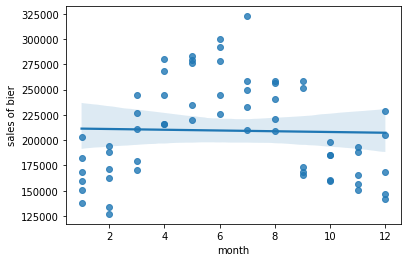

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='month', y='sales of bier', data=df_train)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


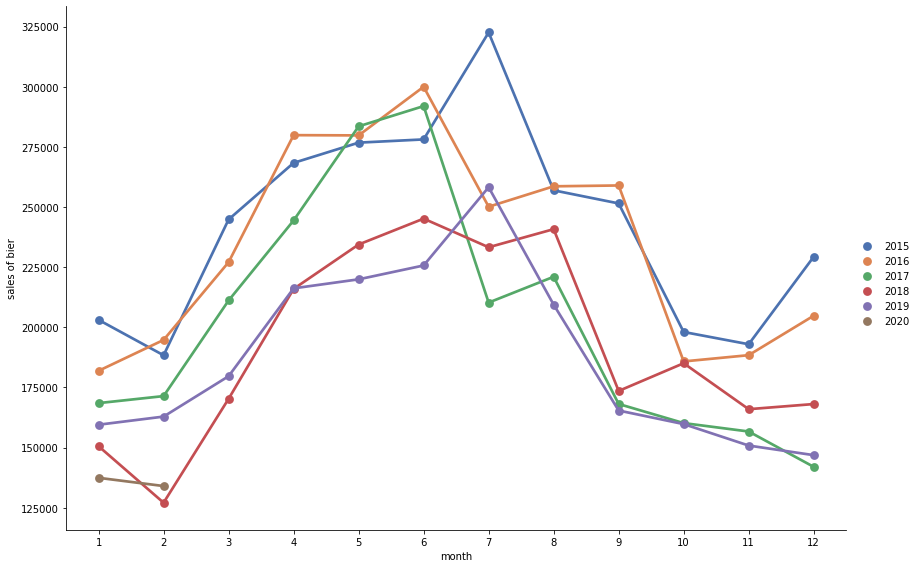

In [ ]:
g = sns.FacetGrid(df_train, height=8,aspect=1.5) 
g.map(sns.pointplot, 'month', 'sales of bier', 'year',palette = 'deep', ci=None)
g.add_legend()

In [ ]:
#Express the month in polar coordinates
import math
month_cos = []
month_sin = []
for i in df_train['month']:
    month_cos.append(math.cos(2*math.pi*i/12))
    month_sin.append(math.sin(2*math.pi*i/12))
df_train['month_cos'] = month_cos
df_train['month_sin'] = month_sin

df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,month_cos,month_sin
0,134028.67,2020,2,3863.850000,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856,5.000000e-01,8.660254e-01
1,137445.95,2020,1,17582.060172,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229,8.660254e-01,5.000000e-01
2,146870.67,2019,12,17582.060172,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417,1.000000e+00,-2.449294e-16
3,150859.03,2019,11,17582.060172,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753,8.660254e-01,-5.000000e-01
4,159777.40,2019,10,17582.060172,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065,5.000000e-01,-8.660254e-01
5,165413.74,2019,9,6479.980000,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483,-1.836970e-16,-1.000000e+00
6,209412.67,2019,8,18210.550000,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549,-5.000000e-01,-8.660254e-01
7,258228.73,2019,7,25959.010000,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542,-8.660254e-01,-5.000000e-01
8,225702.97,2019,6,24032.650000,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535,-1.000000e+00,1.224647e-16
9,219944.99,2019,5,17066.440000,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300,-8.660254e-01,5.000000e-01


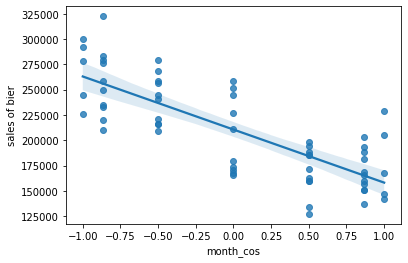

In [ ]:
sns.regplot(x='month_cos', y='sales of bier', data=df_train)

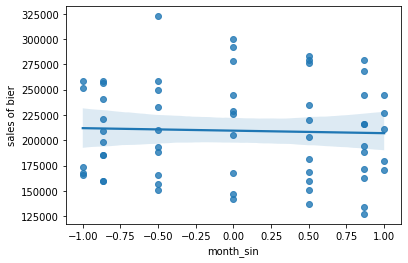

In [ ]:
sns.regplot(x='month_sin', y='sales of bier', data=df_train)

In [ ]:
#lag features
shift_range = [1, 2, 3, 4, 12]
for shift in shift_range:
    df_train['bier_sales_month_shift_' + str(shift)] = df_train['sales of bier'].shift(-shift)
    
df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,month_cos,month_sin,bier_sales_month_shift_1,bier_sales_month_shift_2,bier_sales_month_shift_3,bier_sales_month_shift_4,bier_sales_month_shift_12
0,134028.67,2020,2,3863.850000,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856,5.000000e-01,8.660254e-01,137445.95,146870.67,150859.03,159777.40,162893.86
1,137445.95,2020,1,17582.060172,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229,8.660254e-01,5.000000e-01,146870.67,150859.03,159777.40,165413.74,159519.22
2,146870.67,2019,12,17582.060172,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417,1.000000e+00,-2.449294e-16,150859.03,159777.40,165413.74,209412.67,168105.99
3,150859.03,2019,11,17582.060172,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753,8.660254e-01,-5.000000e-01,159777.40,165413.74,209412.67,258228.73,165971.78
4,159777.40,2019,10,17582.060172,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065,5.000000e-01,-8.660254e-01,165413.74,209412.67,258228.73,225702.97,185073.71
5,165413.74,2019,9,6479.980000,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483,-1.836970e-16,-1.000000e+00,209412.67,258228.73,225702.97,219944.99,173550.96
6,209412.67,2019,8,18210.550000,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549,-5.000000e-01,-8.660254e-01,258228.73,225702.97,219944.99,216197.79,240796.35
7,258228.73,2019,7,25959.010000,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542,-8.660254e-01,-5.000000e-01,225702.97,219944.99,216197.79,179679.72,233274.83
8,225702.97,2019,6,24032.650000,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535,-1.000000e+00,1.224647e-16,219944.99,216197.79,179679.72,162893.86,245171.35
9,219944.99,2019,5,17066.440000,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300,-8.660254e-01,5.000000e-01,216197.79,179679.72,162893.86,159519.22,234416.40


In [ ]:
for shift in shift_range:
    df_train['biermischung_sales_month_shift_' + str(shift)] = df_train['sales of biermischung'].shift(-shift)
    
df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,month_cos,month_sin,bier_sales_month_shift_1,bier_sales_month_shift_2,bier_sales_month_shift_3,bier_sales_month_shift_4,bier_sales_month_shift_12,biermischung_sales_month_shift_1,biermischung_sales_month_shift_2,biermischung_sales_month_shift_3,biermischung_sales_month_shift_4,biermischung_sales_month_shift_12
0,134028.67,2020,2,3863.850000,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856,5.000000e-01,8.660254e-01,137445.95,146870.67,150859.03,159777.40,162893.86,17582.060172,17582.060172,17582.060172,17582.060172,7503.35
1,137445.95,2020,1,17582.060172,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229,8.660254e-01,5.000000e-01,146870.67,150859.03,159777.40,165413.74,159519.22,17582.060172,17582.060172,17582.060172,6479.980000,8684.72
2,146870.67,2019,12,17582.060172,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417,1.000000e+00,-2.449294e-16,150859.03,159777.40,165413.74,209412.67,168105.99,17582.060172,17582.060172,6479.980000,18210.550000,8637.09
3,150859.03,2019,11,17582.060172,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753,8.660254e-01,-5.000000e-01,159777.40,165413.74,209412.67,258228.73,165971.78,17582.060172,6479.980000,18210.550000,25959.010000,7094.87
4,159777.40,2019,10,17582.060172,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065,5.000000e-01,-8.660254e-01,165413.74,209412.67,258228.73,225702.97,185073.71,6479.980000,18210.550000,25959.010000,24032.650000,8253.56
5,165413.74,2019,9,6479.980000,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483,-1.836970e-16,-1.000000e+00,209412.67,258228.73,225702.97,219944.99,173550.96,18210.550000,25959.010000,24032.650000,17066.440000,13472.81
6,209412.67,2019,8,18210.550000,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549,-5.000000e-01,-8.660254e-01,258228.73,225702.97,219944.99,216197.79,240796.35,25959.010000,24032.650000,17066.440000,19946.830000,34696.07
7,258228.73,2019,7,25959.010000,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542,-8.660254e-01,-5.000000e-01,225702.97,219944.99,216197.79,179679.72,233274.83,24032.650000,17066.440000,19946.830000,9570.100000,30616.55
8,225702.97,2019,6,24032.650000,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535,-1.000000e+00,1.224647e-16,219944.99,216197.79,179679.72,162893.86,245171.35,17066.440000,19946.830000,9570.100000,7503.350000,34930.07
9,219944.99,2019,5,17066.440000,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300,-8.660254e-01,5.000000e-01,216197.79,179679.72,162893.86,159519.22,234416.40,19946.830000,9570.100000,7503.350000,8684.720000,28342.60


In [ ]:
#Delete rows containing empty values
df_train.dropna(axis=0, how='any', inplace=True)
df_train

,sales of bier,year,month,sales of biermischung,num of Non-working day,max. temperature,min. temperature,avg temperature,max. Humidit,min. Humidit,avg Humidit,max. Pressure,min. Pressure,avg Pressure,Tweet_Counts,Positive_Percentage(%),Negative_Percentage(%),tone_mean,tone_std,ratio_pos_neg,number_of_articles,polarity_mean,polarity_std,month_cos,month_sin,bier_sales_month_shift_1,bier_sales_month_shift_2,bier_sales_month_shift_3,bier_sales_month_shift_4,bier_sales_month_shift_12,biermischung_sales_month_shift_1,biermischung_sales_month_shift_2,biermischung_sales_month_shift_3,biermischung_sales_month_shift_4,biermischung_sales_month_shift_12
0,134028.67,2020,2,3863.850000,9,16.22,-2.78,6.33,1.00,0.43,0.76,1035.44,989.78,1013.33,348,24.1,12.6,-0.212147,2.396777,1.025641,79.0,5.346522,1.907856,5.000000e-01,8.660254e-01,137445.95,146870.67,150859.03,159777.40,162893.86,17582.060172,17582.060172,17582.060172,17582.060172,7503.35
1,137445.95,2020,1,17582.060172,9,14.11,-5.89,3.56,1.00,0.54,0.88,1047.22,992.33,1023.44,304,30.6,10.9,-0.756005,2.529324,1.430380,192.0,5.361841,2.161229,8.660254e-01,5.000000e-01,146870.67,150859.03,159777.40,165413.74,159519.22,17582.060172,17582.060172,17582.060172,6479.980000,8684.72
2,146870.67,2019,12,17582.060172,11,12.67,-4.78,3.89,1.00,0.53,0.87,1041.67,977.11,1012.89,348,29.6,8.3,-0.000303,1.884312,1.145833,103.0,5.058142,1.416417,1.000000e+00,-2.449294e-16,150859.03,159777.40,165413.74,209412.67,168105.99,17582.060172,17582.060172,6479.980000,18210.550000,8637.09
3,150859.03,2019,11,17582.060172,9,16.00,-2.89,5.44,1.00,0.56,0.88,1024.11,986.56,1005.11,319,32.0,13.2,0.123937,2.737458,0.694737,161.0,5.367346,1.862753,8.660254e-01,-5.000000e-01,159777.40,165413.74,209412.67,258228.73,165971.78,17582.060172,6479.980000,18210.550000,25959.010000,7094.87
4,159777.40,2019,10,17582.060172,9,24.22,-0.56,11.56,1.00,0.45,0.84,1028.44,1000.00,1014.56,333,33.0,9.3,-0.767490,2.468433,1.677419,166.0,5.270834,1.878065,5.000000e-01,-8.660254e-01,165413.74,209412.67,258228.73,225702.97,185073.71,6479.980000,18210.550000,25959.010000,24032.650000,8253.56
5,165413.74,2019,9,6479.980000,9,26.56,2.44,15.00,1.00,0.20,0.73,1034.11,997.33,1018.44,376,28.5,11.7,-0.945471,2.848987,1.232143,250.0,5.837572,1.779483,-1.836970e-16,-1.000000e+00,209412.67,258228.73,225702.97,219944.99,173550.96,18210.550000,25959.010000,24032.650000,17066.440000,13472.81
6,209412.67,2019,8,18210.550000,9,32.44,8.78,20.00,1.00,0.24,0.67,1029.11,1006.11,1016.00,440,29.5,10.0,-1.448155,3.350844,1.366013,362.0,6.014580,2.564549,-5.000000e-01,-8.660254e-01,258228.73,225702.97,219944.99,216197.79,240796.35,25959.010000,24032.650000,17066.440000,19946.830000,34696.07
7,258228.73,2019,7,25959.010000,8,38.11,6.78,20.22,1.00,0.19,0.62,1024.67,999.56,1015.56,394,26.1,11.4,0.313723,2.815715,0.846154,120.0,5.554370,2.052542,-8.660254e-01,-5.000000e-01,225702.97,219944.99,216197.79,179679.72,233274.83,24032.650000,17066.440000,19946.830000,9570.100000,30616.55
8,225702.97,2019,6,24032.650000,11,37.22,7.11,20.11,1.00,0.21,0.66,1026.11,1002.33,1016.11,482,32.4,11.8,-0.052201,2.462516,1.425926,131.0,5.365624,1.520535,-1.000000e+00,1.224647e-16,219944.99,216197.79,179679.72,162893.86,245171.35,17066.440000,19946.830000,9570.100000,7503.350000,34930.07
9,219944.99,2019,5,17066.440000,10,23.89,-0.67,12.00,1.00,0.26,0.71,1037.78,997.89,1014.89,390,27.9,10.8,0.936989,2.873339,0.417582,129.0,5.627590,1.927300,-8.660254e-01,5.000000e-01,216197.79,179679.72,162893.86,159519.22,234416.40,19946.830000,9570.100000,7503.350000,8684.720000,28342.60


In [ ]:
df_train.drop(columns=['sales of bier']).columns.values.tolist()

['year',
 'month',
 'sales of biermischung',
 'num of Non-working day',
 'max. temperature',
 'min. temperature',
 'avg temperature',
 'max. Humidit',
 'min. Humidit',
 'avg Humidit',
 'max. Pressure',
 'min. Pressure',
 'avg Pressure',
 'Tweet_Counts',
 'Positive_Percentage(%)',
 'Negative_Percentage(%)',
 'tone_mean',
 'tone_std',
 'ratio_pos_neg',
 'number_of_articles',
 'polarity_mean',
 'polarity_std',
 'month_cos',
 'month_sin',
 'bier_sales_month_shift_1',
 'bier_sales_month_shift_2',
 'bier_sales_month_shift_3',
 'bier_sales_month_shift_4',
 'bier_sales_month_shift_12',
 'biermischung_sales_month_shift_1',
 'biermischung_sales_month_shift_2',
 'biermischung_sales_month_shift_3',
 'biermischung_sales_month_shift_4',
 'biermischung_sales_month_shift_12']

######
feature selection

In [ ]:
#View the degree of linear correlation of variables#
corr_matrix = df_train.corr()
#corr_matrix
corr_matrix['sales of bier'].sort_values(ascending=False)

sales of bier                        1.000000
bier_sales_month_shift_12            0.838552
sales of biermischung                0.817808
biermischung_sales_month_shift_12    0.794332
bier_sales_month_shift_1             0.765575
max. temperature                     0.699386
avg temperature                      0.684701
min. temperature                     0.595759
biermischung_sales_month_shift_1     0.540661
bier_sales_month_shift_2             0.507376
min. Pressure                        0.481027
biermischung_sales_month_shift_2     0.281962
number_of_articles                   0.250261
polarity_mean                        0.249529
bier_sales_month_shift_3             0.206314
tone_mean                            0.199431
tone_std                             0.115125
polarity_std                         0.096864
num of Non-working day              -0.007099
avg Pressure                        -0.018067
month_sin                           -0.026834
biermischung_sales_month_shift_3  

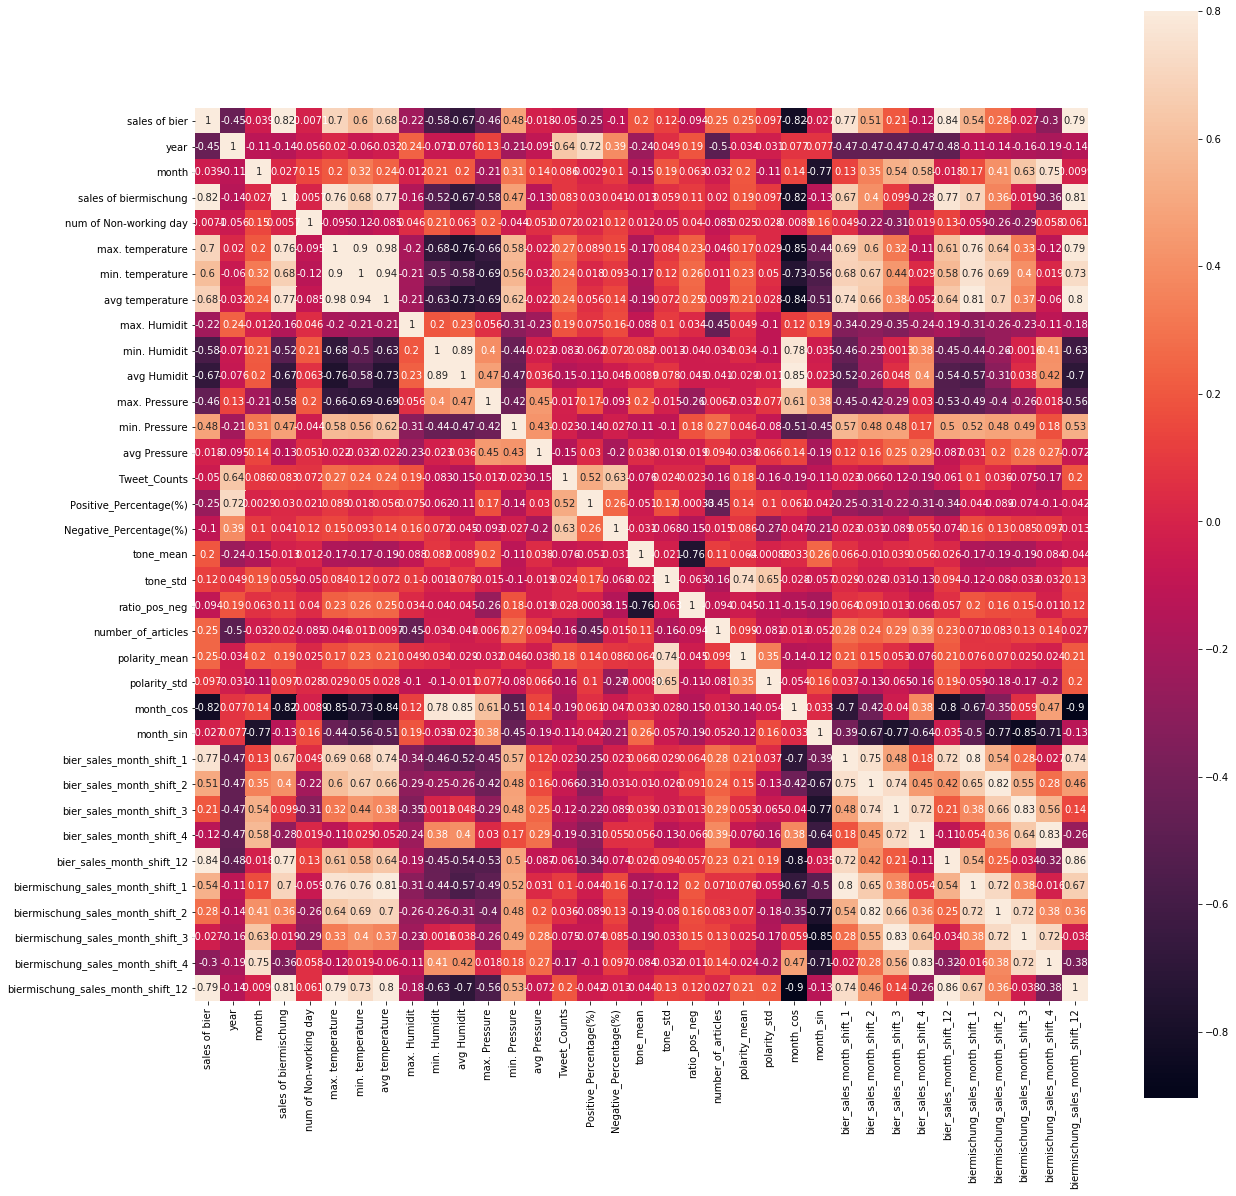

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=0.8, square=True, annot=True)

In [ ]:
X = df_train.drop(columns=['sales of bier'])
X = np.array(X)
y = df_train[['sales of bier']]
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#选择K个最好的特征，返回选择特征后的数据
selector = SelectKBest(f_regression, k=10)
a=selector.fit(X, y)
print(np.array(a.scores_))
print(a.get_support())
print(df_train.drop(columns=['sales of bier']).columns.values.tolist())
dictionary=dict(zip(df_train.drop(columns=['sales of bier']).columns.values.tolist(),a.get_support()))
#dictionary
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]
listA = get_key (dictionary, True)
listA

[1.19874050e+01 7.39223842e-02 9.69321952e+01 2.41904705e-03
 4.59594091e+01 2.64103806e+01 4.23640845e+01 2.48523227e+00
 2.48720531e+01 3.95196555e+01 1.30271369e+01 1.44501288e+01
 1.56725516e-02 1.22485412e-01 3.26428749e+00 5.23901118e-01
 1.98817176e+00 6.44724938e-01 4.23671001e-01 3.20713653e+00
 3.18715394e+00 4.54632890e-01 9.88038637e+01 3.45867288e-02
 6.79715563e+01 1.66404055e+01 2.13397120e+00 6.95955232e-01
 1.13708230e+02 1.98267660e+01 4.14571652e+00 3.59387721e-02
 4.82001699e+00 8.20681307e+01]
[False False  True False  True  True  True False  True  True False False
 False False False False False False False False False False  True False
  True False False False  True False False False False  True]
['year', 'month', 'sales of biermischung', 'num of Non-working day', 'max. temperature', 'min. temperature', 'avg temperature', 'max. Humidit', 'min. Humidit', 'avg Humidit', 'max. Pressure', 'min. Pressure', 'avg Pressure', 'Tweet_Counts', 'Positive_Percentage(%)', 'Nega

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['sales of biermischung',
 'max. temperature',
 'min. temperature',
 'avg temperature',
 'min. Humidit',
 'avg Humidit',
 'month_cos',
 'bier_sales_month_shift_1',
 'bier_sales_month_shift_12',
 'biermischung_sales_month_shift_12']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
model1 = DecisionTreeRegressor()
rfe = RFE(model1,10)
rfe = rfe.fit(X,y)
print(rfe.support_) 
print(rfe.ranking_)
print(df_train.drop(columns=['sales of bier']).columns.values.tolist())
dictionary=dict(zip(df_train.drop(columns=['sales of bier']).columns.values.tolist(),rfe.ranking_))
print(dictionary)
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]
listB = get_key (dictionary, 1)
listB

[False False False False  True False False False False False False  True
 False False False False False  True  True  True False False False False
  True False False False  True  True False  True False  True]
[25 24 19 20  1 11 18 16  3  6 23  1 21  9 14 15 17  1  1  1  4 10 12  8
  1  2 22  5  1  1 13  1  7  1]
['year', 'month', 'sales of biermischung', 'num of Non-working day', 'max. temperature', 'min. temperature', 'avg temperature', 'max. Humidit', 'min. Humidit', 'avg Humidit', 'max. Pressure', 'min. Pressure', 'avg Pressure', 'Tweet_Counts', 'Positive_Percentage(%)', 'Negative_Percentage(%)', 'tone_mean', 'tone_std', 'ratio_pos_neg', 'number_of_articles', 'polarity_mean', 'polarity_std', 'month_cos', 'month_sin', 'bier_sales_month_shift_1', 'bier_sales_month_shift_2', 'bier_sales_month_shift_3', 'bier_sales_month_shift_4', 'bier_sales_month_shift_12', 'biermischung_sales_month_shift_1', 'biermischung_sales_month_shift_2', 'biermischung_sales_month_shift_3', 'biermischung_sales_mo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['max. temperature',
 'min. Pressure',
 'tone_std',
 'ratio_pos_neg',
 'number_of_articles',
 'bier_sales_month_shift_1',
 'bier_sales_month_shift_12',
 'biermischung_sales_month_shift_1',
 'biermischung_sales_month_shift_3',
 'biermischung_sales_month_shift_12']

In [ ]:
set1 = set(listA)
set2 = set(listB)
iset = set1.intersection(set2)
iset

{'bier_sales_month_shift_1',
 'bier_sales_month_shift_12',
 'biermischung_sales_month_shift_12',
 'max. temperature'}

In [ ]:
#pick
#{'bier_sales_month_shift_1',
# 'bier_sales_month_shift_12',
# 'biermischung_sales_month_shift_12',
# 'max. temperature',
# 'min. Humidit'}
# 'month_cos',
# 'tone_std',
# 'ratio_pos_neg'
#as features
y = df_train['sales of bier']
df_train1 = df_train[['bier_sales_month_shift_1',
                     'bier_sales_month_shift_12',
                     'biermischung_sales_month_shift_12',
                     'max. temperature',
                     'min. Humidit',
                     'month_cos',
                     'tone_std',
                     'ratio_pos_neg',
                     ]]
df_train1

,bier_sales_month_shift_1,bier_sales_month_shift_12,biermischung_sales_month_shift_12,max. temperature,min. Humidit,month_cos,tone_std,ratio_pos_neg
0,137445.95,162893.86,7503.35,16.22,0.43,5.000000e-01,2.396777,1.025641
1,146870.67,159519.22,8684.72,14.11,0.54,8.660254e-01,2.529324,1.430380
2,150859.03,168105.99,8637.09,12.67,0.53,1.000000e+00,1.884312,1.145833
3,159777.40,165971.78,7094.87,16.00,0.56,8.660254e-01,2.737458,0.694737
4,165413.74,185073.71,8253.56,24.22,0.45,5.000000e-01,2.468433,1.677419
5,209412.67,173550.96,13472.81,26.56,0.20,-1.836970e-16,2.848987,1.232143
6,258228.73,240796.35,34696.07,32.44,0.24,-5.000000e-01,3.350844,1.366013
7,225702.97,233274.83,30616.55,38.11,0.19,-8.660254e-01,2.815715,0.846154
8,219944.99,245171.35,34930.07,37.22,0.21,-1.000000e+00,2.462516,1.425926
9,216197.79,234416.40,28342.60,23.89,0.26,-8.660254e-01,2.873339,0.417582


In [ ]:
x_test = df_train1.iloc[0 : 14]
x_train = df_train1.iloc[14 : ]
x_test

,bier_sales_month_shift_1,bier_sales_month_shift_12,biermischung_sales_month_shift_12,max. temperature,min. Humidit,month_cos,tone_std,ratio_pos_neg
0,137445.95,162893.86,7503.35,16.22,0.43,5.000000e-01,2.396777,1.025641
1,146870.67,159519.22,8684.72,14.11,0.54,8.660254e-01,2.529324,1.430380
2,150859.03,168105.99,8637.09,12.67,0.53,1.000000e+00,1.884312,1.145833
3,159777.40,165971.78,7094.87,16.00,0.56,8.660254e-01,2.737458,0.694737
4,165413.74,185073.71,8253.56,24.22,0.45,5.000000e-01,2.468433,1.677419
5,209412.67,173550.96,13472.81,26.56,0.20,-1.836970e-16,2.848987,1.232143
6,258228.73,240796.35,34696.07,32.44,0.24,-5.000000e-01,3.350844,1.366013
7,225702.97,233274.83,30616.55,38.11,0.19,-8.660254e-01,2.815715,0.846154
8,219944.99,245171.35,34930.07,37.22,0.21,-1.000000e+00,2.462516,1.425926
9,216197.79,234416.40,28342.60,23.89,0.26,-8.660254e-01,2.873339,0.417582


In [ ]:
y_test = y.iloc[0 : 14]
y_train = y.iloc[14 : ]
y_test

0     134028.67
1     137445.95
2     146870.67
3     150859.03
4     159777.40
5     165413.74
6     209412.67
7     258228.73
8     225702.97
9     219944.99
10    216197.79
11    179679.72
12    162893.86
13    159519.22
Name: sales of bier, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8295836500340468

In [ ]:
from sklearn.linear_model import Ridge
clf=Ridge(alpha=1.0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8512666218013314

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score (x_test,y_test)

0.8371570188714117

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7372935225496535

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)

regr.fit(x_train,y_train)
regr.score(x_test,y_test)


0.7862460403274493